### BitFlip Code

Single Qubit Error Correcting 3-Qubit Code

In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit_ibm_runtime import *
from qiskit_ibm_runtime import EstimatorV2
from qiskit_aer.primitives import Estimator

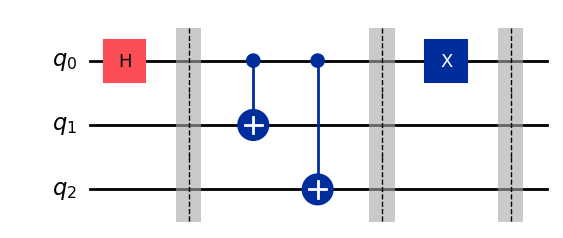

In [2]:
qc = QuantumCircuit(3)

# State Preparation
qc.h(0)
qc.barrier()

# Encoding
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
qc.x(0)                  # Apply X on a different qubit to see the change in circuit and other variables
qc.barrier()
qc.draw(output='mpl')

EstimatorResult(values=array([ 1., -1.]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.0007645, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'time_taken': 0.003573375, 'measure_sampling': True, 'num_clbits': 3, 'max_memory_mb': 8192, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.0007645, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'time_taken': 0.003573375, 'measure_sampling': True, 'num

<BarContainer object of 2 artists>

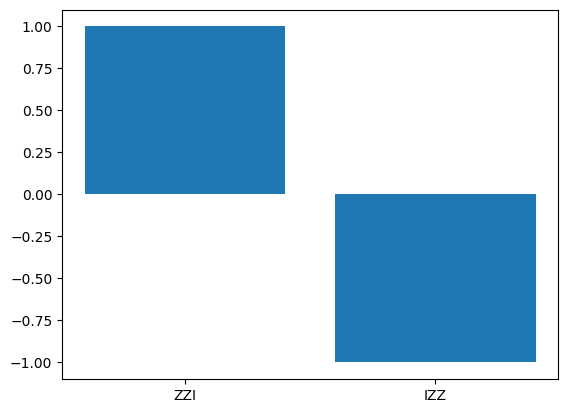

In [3]:
# ZZ measurements

observables_labels = ["ZZI", "IZZ"]
observables = [SparsePauliOp(label) for label in observables_labels]

result = Estimator().run([qc]*2, observables).result()
print(result)

# Plot using Matplotlib
from matplotlib import pyplot as plt
plt.bar(observables_labels, result.values)

[ 1. -1.]


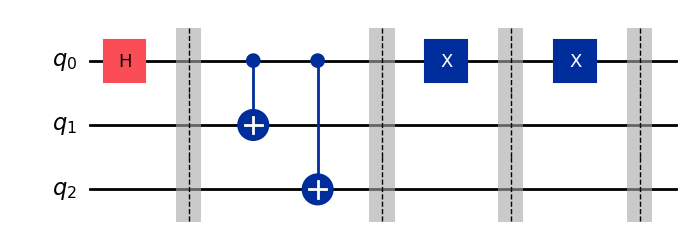

In [4]:
# Recovery

l = result.values
print(l)

if l[0]==1 and l[1]==-1:
    qc.x(0)
    
elif l[0]==-1 and l[1]==1:
    qc.x(2)
    
elif l[0]==-1 and l[1]==-1:
    qc.x(1)
    
qc.barrier()
qc.draw(output='mpl')

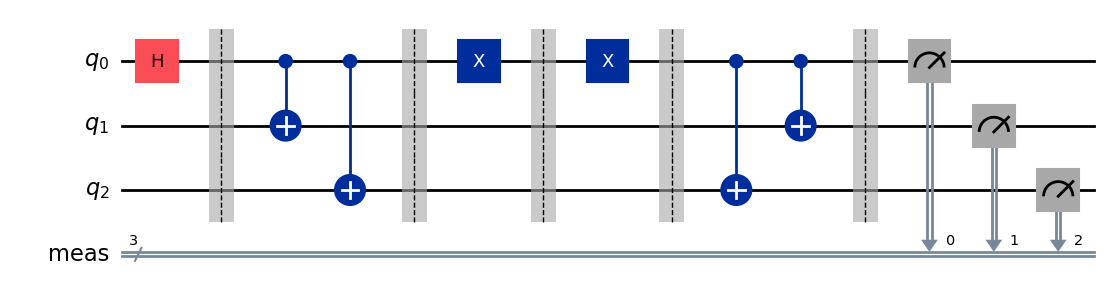

In [5]:
# Decoding

qc.cx(0,2)
qc.cx(0,1)
qc.measure_all()

qc.draw(output='mpl')

{'001': 4050, '000': 4142}


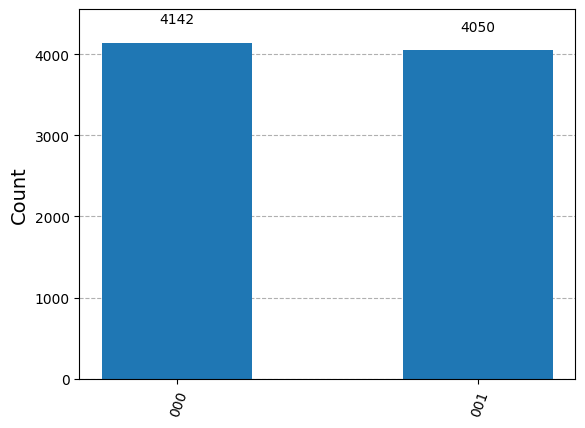

In [6]:
# Measurement

from qiskit_aer import AerSimulator

backend = AerSimulator()

job = backend.run(qc, backend=backend, shots=8192)


result = job.result()

dist = result.get_counts()
print(dist)
plot_histogram(dist)